# William Antony - Company Sales Data Analysis

In this case, I want to analyze 3 things:

1. Which product lines have the highest and lowest sales? Create a chart that is representable.
2. Show sales performance over time, is there any pattern?
3. How does deal size (small, medium, large) correlate with total sales? What is the percentage of contribution for each type of deal?

* Upload file sales data from xlsx file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Copy of Sales Data - New.xlsx to Copy of Sales Data - New (2).xlsx


* Import necessary library for this analysis

In [ ]:
# !pip uninstall pandasai -y
!pip install pandasai --quiet
!pip show pandasai

Name: pandasai
Version: 2.2.12
Summary: Chat with your database (SQL, CSV, pandas, polars, mongodb, noSQL, etc). PandasAI makes data analysis conversational using LLMs (GPT 3.5 / 4, Anthropic, VertexAI) and RAG.
Home-page: 
Author: Gabriele Venturi
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: astor, duckdb, faker, jinja2, matplotlib, openai, pandas, pillow, pydantic, python-dotenv, requests, scipy, sqlalchemy, sqlglot
Required-by: 


In [ ]:
import os
import pandas as pd
from pandasai import SmartDataframe
import matplotlib.pyplot as plt
import seaborn as sns
from pandasai.llm.openai import OpenAI
from IPython.display import Image, display
# os.environ['PANDASAI_API_KEY'] = '$2a$10$14N4yIWnXRE2DtqghHyEF.LBsWzH6SJiXG99nESmpoAx/CO8jtGAS'

* Display the **dataframe**

In [ ]:
#  Read the file
df = pd.read_excel('Copy of Sales Data - New.xlsx')

# Display dataFrame tersebut
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


* Since we don't have sales data, we can create with QUANTITYORDER * PRICEEACH

In [ ]:
# Make a copy for cleaned dataframe
df_cleaned = df.copy()

# Fix order date type
df_cleaned['ORDERDATE'] = pd.to_datetime(df_cleaned['ORDERDATE'])

# create sales column
df_cleaned['SALES'] = df_cleaned['QUANTITYORDERED'] * df_cleaned['PRICEEACH']

print('Dataframe after cleaning:')
print(df_cleaned.info())
df_cleaned.head()

Dataframe after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2824 non-null   int64         
 1   QUANTITYORDERED  2824 non-null   int64         
 2   PRICEEACH        2824 non-null   float64       
 3   ORDERDATE        2824 non-null   datetime64[ns]
 4   STATUS           2824 non-null   object        
 5   PRODUCTLINE      2824 non-null   object        
 6   PRODUCTCODE      2824 non-null   object        
 7   CUSTOMERNAME     2824 non-null   object        
 8   CITY             2824 non-null   object        
 9   DEALSIZE         2824 non-null   object        
 10  SALES            2824 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 242.8+ KB
None


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,SALES
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00


* Check There is there is NaN or Null values or duplicated values in the dataframe

In [ ]:
# Check if there is NaN Values
nan_columns = df_cleaned.isnull().any()
print(nan_columns)

ORDERNUMBER        False
QUANTITYORDERED    False
PRICEEACH          False
ORDERDATE          False
STATUS             False
PRODUCTLINE        False
PRODUCTCODE        False
CUSTOMERNAME       False
CITY               False
DEALSIZE           False
SALES              False
dtype: bool


In [ ]:
# Check if theres duplicate or not
df_cleaned[df_cleaned.duplicated(keep = False)]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,SALES
120,10111,28,64.33,2003-03-25,Shipped,Vintage Cars,S18_2957,Mini Wheels Co.,San Francisco,Small,1801.24
121,10111,28,64.33,2003-03-25,Shipped,Vintage Cars,S18_2957,Mini Wheels Co.,San Francisco,Small,1801.24


In [ ]:
# Drop the duplicate
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2823
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   ORDERDATE        2823 non-null   datetime64[ns]
 4   STATUS           2823 non-null   object        
 5   PRODUCTLINE      2823 non-null   object        
 6   PRODUCTCODE      2823 non-null   object        
 7   CUSTOMERNAME     2823 non-null   object        
 8   CITY             2823 non-null   object        
 9   DEALSIZE         2823 non-null   object        
 10  SALES            2823 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 264.7+ KB


1. Which product lines have the highest and lowest sales? Create a chart that is representable.

In [ ]:
prod_line_sales = df_cleaned.groupby('PRODUCTLINE', as_index = False)['SALES'].sum()

prod_line_sales

,PRODUCTLINE,SALES
0,Classic Cars,2968546.40
1,Motorcycles,971086.29
2,Planes,877942.21
3,Ships,677940.40
4,Trains,203804.26
5,Trucks and Buses,947355.18
6,Vintage Cars,1644212.05


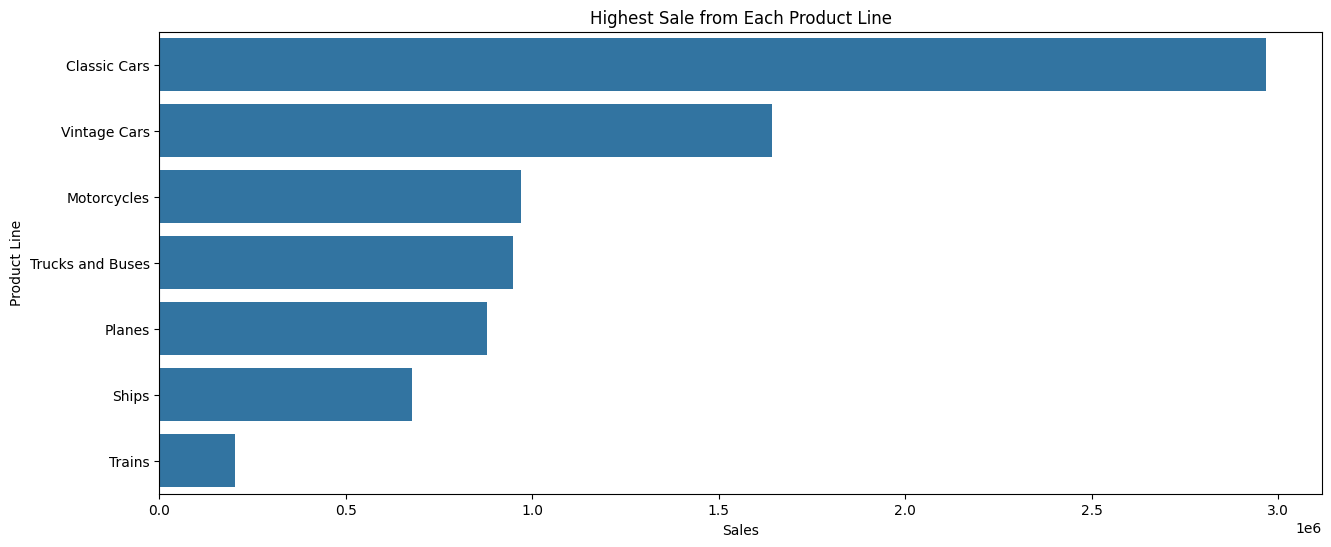

In [ ]:
# Sort the dataframe by SALES in descending order
prod_line_sales_sorted = prod_line_sales.sort_values('SALES', ascending=False)

# Create the bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='SALES', y='PRODUCTLINE', data=prod_line_sales_sorted)
plt.xlabel('Sales')
plt.ylabel('Product Line')
plt.title('Highest Sale from Each Product Line')
plt.show()

We also can create this chart using pandas AI

In [ ]:
# Set the API key (usually done once and not in the code directly)
os.environ["OPENAI_API_KEY"] = "insert-your-api-key"

# Retrieve the API key
api_key = os.getenv("OPENAI_API_KEY")

# Print the API key
print(api_key)

sk-proj-J6kAc0uaeXcjjWkMhe4QT3BlbkFJj1ARvIX4cEOOSmluIgNU


In [ ]:
df_cleaned

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,SALES
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00
...,...,...,...,...,...,...,...,...,...,...,...
2819,10425,49,100.00,2005-05-31,In Process,Trucks and Buses,S24_2300,La Rochelle Gifts,Nantes,Medium,4900.00
2820,10425,31,33.24,2005-05-31,In Process,Classic Cars,S24_2840,La Rochelle Gifts,Nantes,Small,1030.44
2821,10425,41,86.68,2005-05-31,In Process,Trucks and Buses,S32_1268,La Rochelle Gifts,Nantes,Medium,3553.88
2822,10425,11,43.83,2005-05-31,In Process,Trucks and Buses,S32_2509,La Rochelle Gifts,Nantes,Small,482.13


In [ ]:
llm = OpenAI(api_key=api_key)
pandas_ai = SmartDataframe(df_cleaned, config={"llm": llm})

In [ ]:
# Using Pandas AI to see which product line have the highest and lowest sales?
try:
    query = "Which product lines have the highest and lowest sales?"
    answer = pandas_ai.chat(query)

    # Print the answer
    print("Answer:", answer)

except Exception as e:
    print("An error occurred:", e)

{'type': 'string', 'value': "The product line with the highest sales is 'Classic Cars' with sales of 2968546.4. The product line with the lowest sales is 'Trains' with sales of 203804.26."}
Answer: The product line with the highest sales is 'Classic Cars' with sales of 2968546.4. The product line with the lowest sales is 'Trains' with sales of 203804.26.


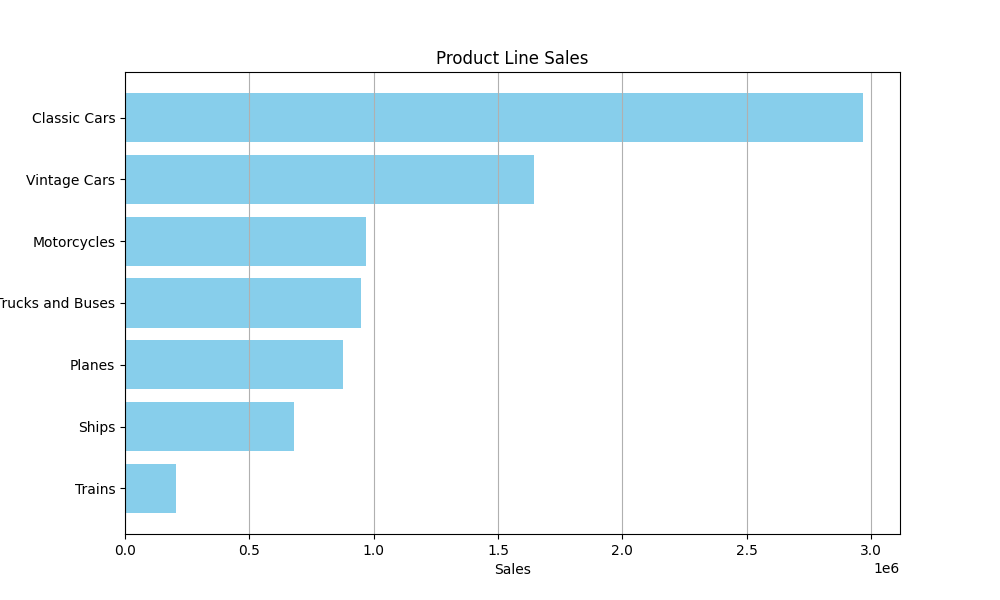

In [ ]:
# Using Pandas AI to make the chart
try:
    query = "Create a chart to show which product line have the highest and lowest sales using horizontal chart, sort by ascending order"
    answer = pandas_ai.chat(query)

    # Display the image
    display(Image(filename=answer))

except Exception as e:
    print("An error occurred:", e)

2. Show sales performance over time, is there any pattern?

In [ ]:
daily_sales = df_cleaned.groupby('ORDERDATE', as_index = False)['SALES'].sum()
daily_sales

,ORDERDATE,SALES
0,2003-01-06,9982.25
1,2003-01-09,8976.96
2,2003-01-10,5955.74
3,2003-01-29,47886.21
4,2003-01-31,35084.80
...,...,...
247,2005-05-13,24502.48
248,2005-05-17,46475.40
249,2005-05-29,47187.74
250,2005-05-30,14578.75


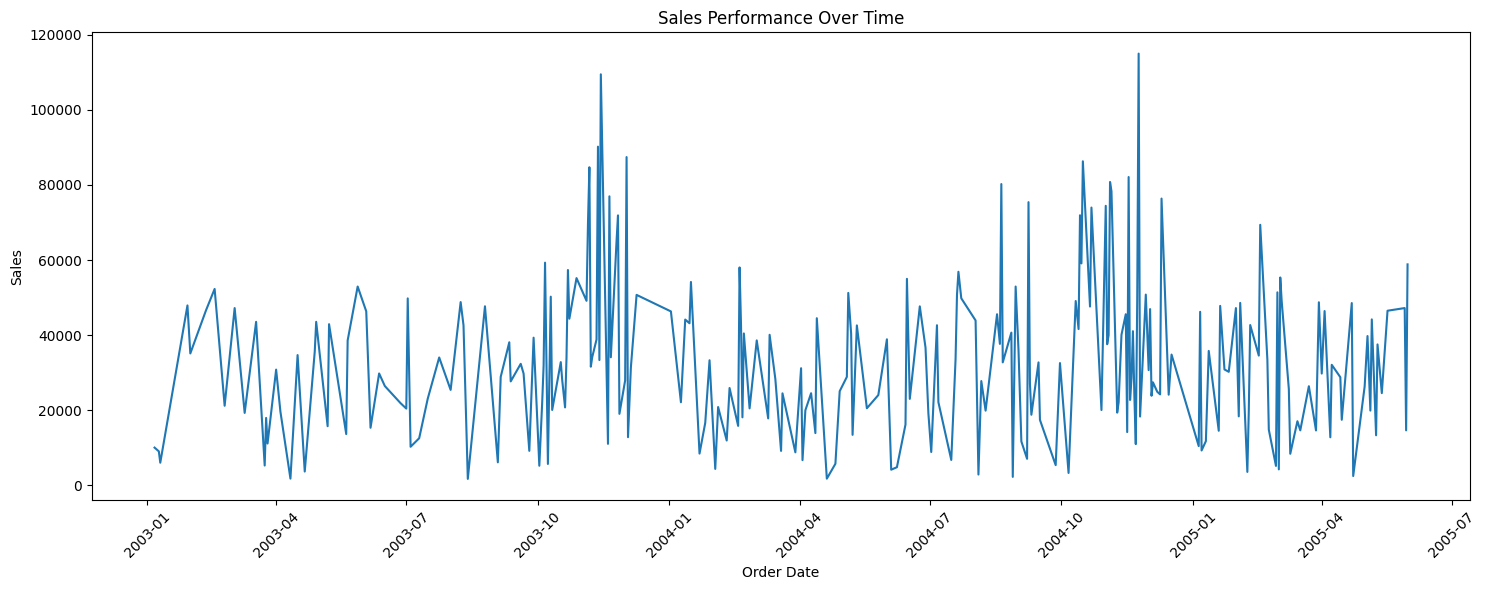

In [ ]:
# Create line chart
plt.figure(figsize=(15, 6))
plt.plot(daily_sales['ORDERDATE'], daily_sales['SALES'])
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Performance Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

as we can see, there are many spikes at the end of the year (in 2003 and 2004), so we can say that we are getting higher sales at the end of the year. We can put it as consideration to make strategic sales during the end of the year.

we can also see monthly sales using pandas AI

'/content/exports/charts/temp_chart.png'

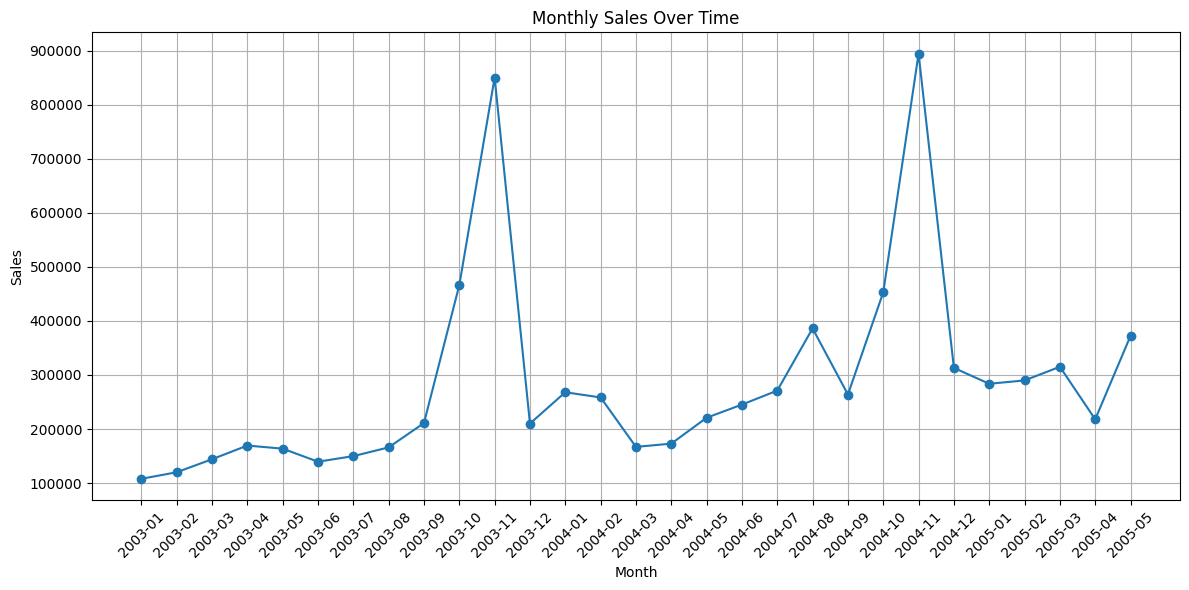

In [ ]:
answer = pandas_ai.chat("is there any seasonality in sales?")
answer

As we can see, the highest sales is between October and November, which prove our assumption is true

3. How does deal size (small, medium, large) correlate with total sales? What is the percentage of contribution for each type of deal?

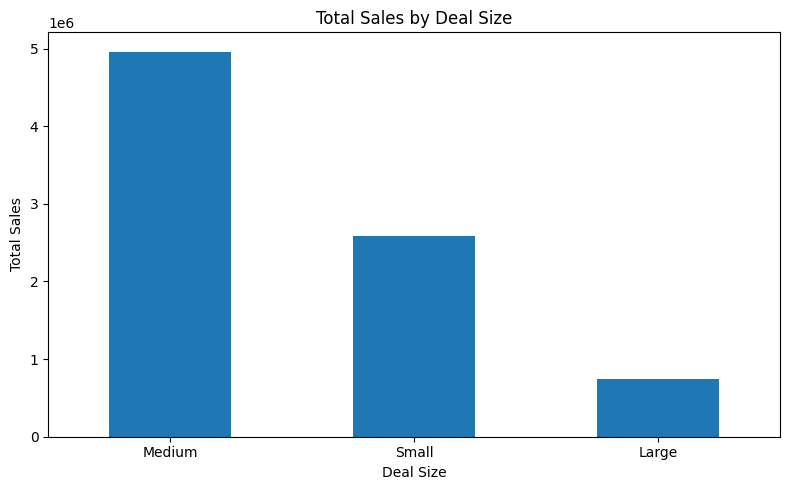

In [ ]:
# prompt: create a bar chart to see which dealsize has the most sales and  i want to sort the sales by descending order

# Group the data by deal size and calculate the total sales for each group
deal_size_sales = df_cleaned.groupby('DEALSIZE')['SALES'].sum().sort_values(ascending=False)

# Create a bar chart to visualize the total sales by deal size
plt.figure(figsize=(8, 5))
deal_size_sales.plot(kind='bar')
plt.xlabel('Deal Size')
plt.ylabel('Total Sales')
plt.title('Total Sales by Deal Size')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


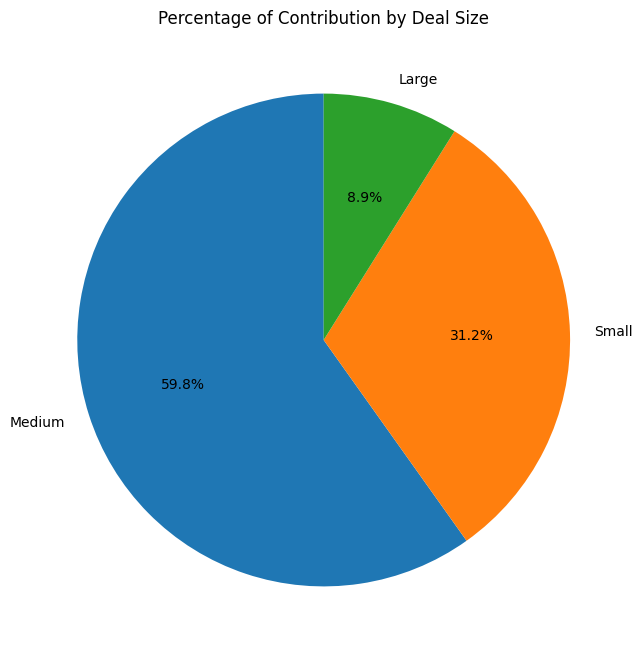

In [ ]:
# Calculate the percentage of contribution for each deal size
deal_size_percentage = deal_size_sales / deal_size_sales.sum() * 100

# Create a pie chart to visualize the percentage of contribution for each deal size
plt.figure(figsize=(8, 8))
plt.pie(deal_size_percentage, labels=deal_size_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Contribution by Deal Size')
plt.show()

From the bar and pie charts, we observe that medium-sized deals contribute up to 60% of sales, while large-sized deals have the lowest contribution at 9%. To increase income, we should focus our strategies on promoting medium-sized deals and consider offering discounts to boost the sales of large-sized deals.

We can also use Pandas AI to create this 2 charts

In [ ]:
answer = pandas_ai.chat("How does deal size (small, medium, large) correlate with total sales?")
answer

,DEALSIZE,SALES
0,Large,738757.91
1,Medium,4961736.68
2,Small,2590392.20


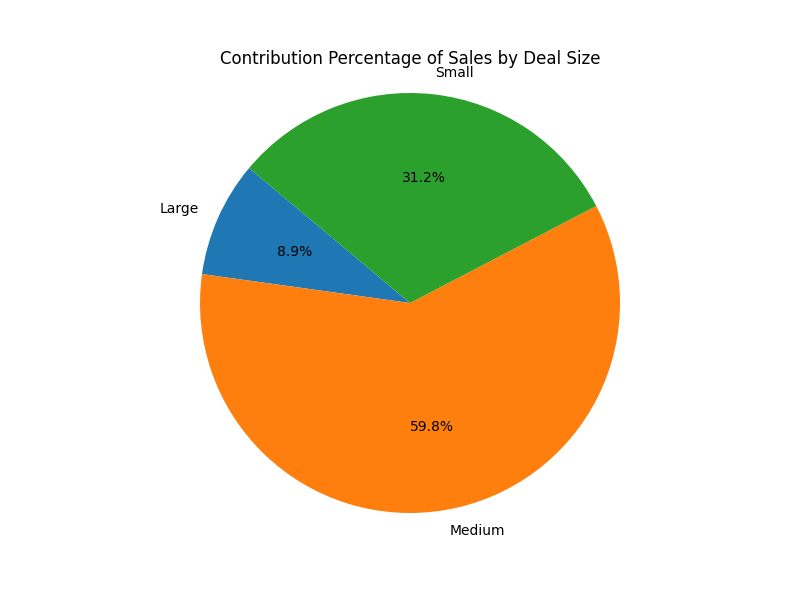

In [ ]:
answer = pandas_ai.chat("Create pie chart to show contribution percentage sales from deal size")
display(Image(filename=answer))

4. Next, I want to export the cleaned dataframe into excel to create a dashboard with this data. I use Looker Studio to create the dashboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Example path to save a file to the root of your Google Drive
excel_file_path = '/content/drive/My Drive/Colab Notebooks/cleaned_sales_data.xlsx'
df_cleaned.to_excel(excel_file_path, index=False)
print(f"DataFrame successfully exported to '{excel_file_path}'.")

DataFrame successfully exported to '/content/drive/My Drive/Colab Notebooks/cleaned_sales_data.xlsx'.


Link to Dashboard: https://lookerstudio.google.com/reporting/720cd15b-7545-4d22-85c6-4acda41dbe96